# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pyabf
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from scipy.fft import fft, fftfreq, fftshift
from scipy import signal

In [2]:
tf.__version__

'2.3.1'

# Extracting all .abf files and Splitting data into dependent and independent variables

In [63]:
X = []
y = []
split = 12000
sizes = os.listdir('./data')

# for reading all the abf in the directory
for size in sizes:
    files = os.listdir('./data/' + str(size))
    for file in files:
        abf = pyabf.ABF('./data/' + str(size) + '/' + str(file))
        
# tidying up the data
        abf.setSweep(0)
        current = abf.sweepY
        current = -current
        
        for n in range(0,len(current)):
            if n%split == 0:
                X.append(current[n:n+split])
                y.append(size)
                

#  converting the data into a numpy array
print(X[0],y[0])

[-16044.312 -16042.48  -16041.26  ... -16044.312 -16043.091 -16043.091] 20


In [64]:
print(len(X), len(X[0]))

15000 12000


# Normalize X data

In [65]:
X = tf.keras.utils.normalize(X)

# Fast Fourier Transform

In [66]:
Xf = []
for n in range(0,len(X)):
    yf = abs(fft(X[n]))[1:]
    yf = yf/max(yf)
    Xf.append(yf)
Xf = np.array(Xf)

In [67]:
Xf[0]

array([1.    , 0.6244, 0.246 , ..., 0.246 , 0.6244, 1.    ], dtype=float32)

# Categorical encoding for Y

In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

# Train test split

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xf, y, test_size = 0.2, random_state = 0)

In [70]:
X_train, y_train

(array([[0.5246, 0.2166, 0.5639, ..., 0.5639, 0.2166, 0.5246],
        [1.    , 0.7813, 0.0415, ..., 0.0415, 0.7813, 1.    ],
        [0.0736, 0.9867, 0.2455, ..., 0.2455, 0.9867, 0.0736],
        ...,
        [0.0654, 0.2488, 0.3864, ..., 0.3864, 0.2488, 0.0654],
        [0.8306, 0.0902, 0.5169, ..., 0.5169, 0.0902, 0.8306],
        [0.6946, 0.2397, 1.    , ..., 1.    , 0.2397, 0.6946]],
       dtype=float32),
 array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]], dtype=float32))

In [71]:
for each in X_train[0][0:100]:
    print(each)

0.5246157
0.21661395
0.5638658
0.8103195
1.0
0.69526863
0.30450416
0.029820478
0.7296079
0.50192904
0.16164093
0.4740974
0.29005983
0.69831216
0.25299805
0.18907434
0.10558881
0.23143402
0.75535214
0.29027244
0.19495334
0.62356204
0.12989981
0.20288973
0.8306743
0.38559598
0.27393854
0.30443025
0.5435606
0.25980923
0.13858716
0.35604024
0.22847533
0.31735098
0.4192312
0.3644708
0.18939188
0.45987695
0.059236016
0.2379248
0.37048656
0.13229793
0.5894376
0.53604454
0.3971833
0.32430914
0.5787182
0.15230691
0.23758863
0.30119744
0.61756647
0.12924714
0.22656395
0.3073176
0.5531056
0.56989276
0.21683204
0.12553649
0.22926316
0.32591236
0.19396192
0.46912307
0.18349524
0.34211493
0.5809863
0.43578282
0.4640375
0.20590217
0.55195856
0.24472614
0.32769012
0.34344098
0.23014376
0.21066429
0.2932745
0.34415695
0.22985508
0.15959798
0.24261612
0.16489944
0.3615071
0.33154795
0.29535958
0.36039808
0.449775
0.2772072
0.31768668
0.12270793
0.15927051
0.48891634
0.46561244
0.3104977
0.19230638
0.327

In [72]:
X_test, y_test

(array([[0.6795, 0.6359, 0.7393, ..., 0.7393, 0.6359, 0.6795],
        [0.5393, 0.4333, 0.5255, ..., 0.5255, 0.4333, 0.5393],
        [1.    , 0.4788, 0.8922, ..., 0.8922, 0.4788, 1.    ],
        ...,
        [1.    , 0.3154, 0.3112, ..., 0.3112, 0.3154, 1.    ],
        [0.579 , 0.9017, 0.8518, ..., 0.8518, 0.9017, 0.579 ],
        [1.    , 0.7852, 0.4579, ..., 0.4579, 0.7852, 1.    ]],
       dtype=float32),
 array([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]], dtype=float32))

# Converting to Multivariate
The input to the convolutional network must be 3D, therefore the it has to be reshaped into a 3-dimensional array

In [73]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [74]:
X_train[0][0][0]

0.5246157

# Shuffling and the preprocessed data

In [75]:
# shuffling
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]
print(idx)

[ 3662  4228  9863 ...  4642 10926 10817]


In [76]:
X_train, y_train, X_train.shape

(array([[[0.8412],
         [1.    ],
         [0.8469],
         ...,
         [0.8469],
         [1.    ],
         [0.8412]],
 
        [[1.    ],
         [0.3786],
         [0.249 ],
         ...,
         [0.249 ],
         [0.3786],
         [1.    ]],
 
        [[1.    ],
         [0.0364],
         [0.5465],
         ...,
         [0.5465],
         [0.0364],
         [1.    ]],
 
        ...,
 
        [[0.8219],
         [0.8627],
         [0.6911],
         ...,
         [0.6911],
         [0.8627],
         [0.8219]],
 
        [[0.8349],
         [0.5822],
         [1.    ],
         ...,
         [1.    ],
         [0.5822],
         [0.8349]],
 
        [[0.4692],
         [0.6766],
         [0.454 ],
         ...,
         [0.454 ],
         [0.6766],
         [0.4692]]], dtype=float32),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]], dtype=float32),
 (12000, 11999, 1))

In [77]:
X_test, y_test, X_test.shape

(array([[[0.6795],
         [0.6359],
         [0.7393],
         ...,
         [0.7393],
         [0.6359],
         [0.6795]],
 
        [[0.5393],
         [0.4333],
         [0.5255],
         ...,
         [0.5255],
         [0.4333],
         [0.5393]],
 
        [[1.    ],
         [0.4788],
         [0.8922],
         ...,
         [0.8922],
         [0.4788],
         [1.    ]],
 
        ...,
 
        [[1.    ],
         [0.3154],
         [0.3112],
         ...,
         [0.3112],
         [0.3154],
         [1.    ]],
 
        [[0.579 ],
         [0.9017],
         [0.8518],
         ...,
         [0.8518],
         [0.9017],
         [0.579 ]],
 
        [[1.    ],
         [0.7852],
         [0.4579],
         ...,
         [0.4579],
         [0.7852],
         [1.    ]]], dtype=float32),
 array([[1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]], dtype=float32),
 (3000, 11999, 1))

# End of Preprocessing

# Building the CNN

In [82]:
from tensorflow import keras

# input shape
input_shape=(X_train.shape[1], 1)

# build network topology
model = keras.Sequential()

# 1st conv layer
model.add(keras.layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
model.add(keras.layers.MaxPooling1D(3, strides=2, padding='same'))
model.add(keras.layers.BatchNormalization())

# 2nd conv layer
model.add(keras.layers.Conv1D(32, 3, activation='relu'))
model.add(keras.layers.MaxPooling1D(3, strides=2, padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))

# 3rd conv layer
model.add(keras.layers.Conv1D(64, 2, activation='relu'))
model.add(keras.layers.MaxPooling1D(2, strides=2, padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.1))

# flatten output and feed it into dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
# specifing the number of outputs and the activation function
model.add(keras.layers.Dense(3, activation='softmax'))

In [83]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 11997, 32)         128       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 5999, 32)          0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 5999, 32)          128       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 5997, 32)          3104      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 2999, 32)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 2999, 32)          128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 2999, 32)         

In [85]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
375/375 [==============================] - 430s 1s/step - loss: 1.8632 - accuracy: 0.4701
Epoch 2/20
375/375 [==============================] - 479s 1s/step - loss: 0.8378 - accuracy: 0.5978
Epoch 3/20
375/375 [==============================] - 471s 1s/step - loss: 0.4876 - accuracy: 0.7798
Epoch 4/20
375/375 [==============================] - 472s 1s/step - loss: 0.4965 - accuracy: 0.7715
Epoch 5/20
375/375 [==============================] - 473s 1s/step - loss: 0.4136 - accuracy: 0.8098
Epoch 6/20
375/375 [==============================] - 395s 1s/step - loss: 0.2942 - accuracy: 0.8717
Epoch 7/20
375/375 [==============================] - 330s 880ms/step - loss: 0.3527 - accuracy: 0.8411
Epoch 8/20
375/375 [==============================] - 331s 881ms/step - loss: 0.2112 - accuracy: 0.8992
Epoch 9/20
375/375 [==============================] - 327s 871ms/step - loss: 0.1771 - accuracy: 0.9310
Epoch 10/20
375/375 [==============================] - 320s 855ms/step - loss: 0.1

In [60]:
pred_history = model.evaluate(X_test, y_test)


94/94 [==============================] - 13s 135ms/step - loss: 1.0494 - accuracy: 0.7147


In [58]:
pred_history

[0.0, 0.0]

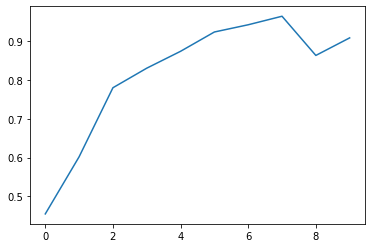

In [40]:
plt.plot(history.history['accuracy'])

In [39]:
pred_history

[1.049381971359253, 0.7146666646003723]